you might have to pip install nltk & pip install sklearn

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


read data from csv file and print to see if read correctly

In [24]:
df = pd.read_csv('StackOverflow-Dataset2.csv', delimiter=";")
print(df.head(10))

                                               title   label
0              Using entries from other kivy classes  python
1   Package python software with pylucene dependency  python
2           Extracting time with regex from a string  python
3  How do I add specific headers before each form...  python
4  Barplot from a dataframe using a column to set...  python
5  python how to collect a specific file from a l...  python
6  &lt;select&gt; element is displayed with defau...  python
7  Multiple GET Requests, merge json response int...  python
8  Python SpeechRecognition mic in list_microphon...  python
9                speech recognition not taking input  python


Print out number of words in dataset

In [25]:
wordsPreClean = df['title'].apply(lambda x: len(x.split(' '))).sum()
print(wordsPreClean)

502996


<AxesSubplot:>

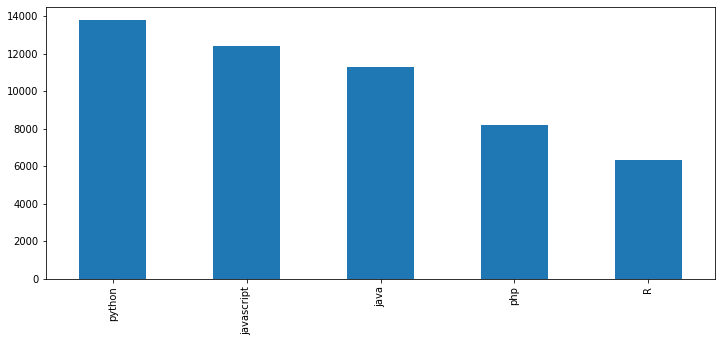

In [26]:
plt.figure(figsize=(12,5))
df.label.value_counts().plot(kind='bar')

Data isn't completely evenly split there is alot less PHP and R labels in the data set

In [27]:
def print_plot(index):
    example = df[df.index == index][['title', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_plot(51)

Creating a histogram raises: &quot;only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices&quot;
label: python


Clean the text for easier processing

In [28]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_.]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

In [29]:
df['title'] = df['title'].apply(clean_text)
print_plot(51)

creating histogram raises quot integers slices ellipsis numpy newaxis none integer boolean arrays valid indices quot
label: python


In [30]:
wordsPostCLean = df['title'].apply(lambda x: len(x.split(' '))).sum()
print(wordsPostCLean)

351660


In [31]:
print('the processiung has reduced the number of words by:')
print(wordsPreClean-wordsPostCLean)

the processiung has reduced the number of words by:
151336


Split data into train,validation,test

In [44]:
train_data = df.iloc[:, :round(len(df.index)*0.6)] #takes 60% for test data
x_train = train_data.title
y_train = train_data.label

#if you algorithm doesn't need validation yuo can change the split to 80/20 train/test or whatever you fin to give the best results for you algorithm 

validation_data = df.iloc[round(len(df.index)*0.6):round(len(df.index)*0.8)] #takes 20% for validation
x_val = validation_data.title
y_val = validation_data.label

test_data = df.iloc[round(len(df.index)*0.8):] #takes 20% for test
x_test = test_data.title
y_test = test_data.label

Creates a word count vector of words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() # instantiate count vector
count_vectorizer.fit(x) # creates vector
vector =  count_vectorizer.transform(x_train)
#print('Vocabulary: ')
#print(vector.toarray())
#print(vectorizer.vocabulary_)

Create Word Frequencies with TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
freq_vectorizer = TfidfVectorizer()
freq_vectorizer.fit(x_train)
#print(freq_vectorizer.vocabulary_)
#print(freq_vectorizer.idf_)

TfidfVectorizer()